# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [69]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [70]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


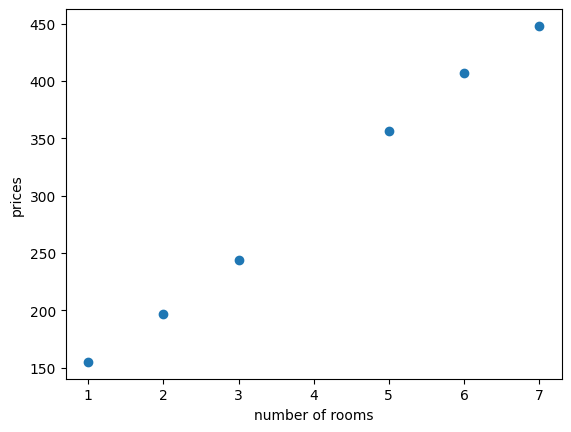

In [71]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [72]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room += small_random_1
        base_price -= small_random_2
    return price_per_room, base_price

In [73]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    prediction = base_price + price_per_room*num_rooms
    price_per_room = price_per_room + learning_rate*(price-prediction)*num_rooms
    base_price = base_price + learning_rate*(price-prediction)
    return price_per_room, base_price

In [74]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    prediction = base_price + price_per_room*num_rooms
    if(price>prediction):
        price_per_room = price_per_room + learning_rate*num_rooms
        base_price = base_price + learning_rate
    else:
        price_per_room = price_per_room - learning_rate*num_rooms
        base_price = base_price - learning_rate
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 40.22442185152521
Base price: 10.757954402940118


(np.float64(40.22442185152521), 10.757954402940118)

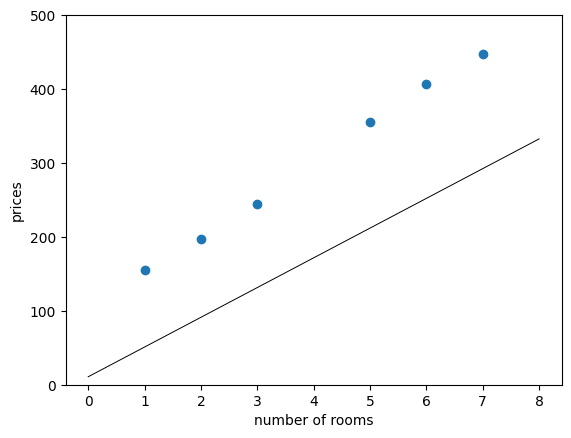

In [75]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for i in range(epochs):
        index = rd.randint(0,len(features)-1)
        price_per_room, base_price =absolute_trick(base_price, price_per_room, features[index], labels[index], learning_rate)
        #price_per_room, base_price = square_trick(base_price, price_per_room, features[index], labels[index], learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Root mean squared error function

In [76]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    error = np.sum(np.square(predictions-labels))/len(labels)
    return error

### Plotting the error function

Price per room: 50.65781332767556
Base price: 99.79504258184782


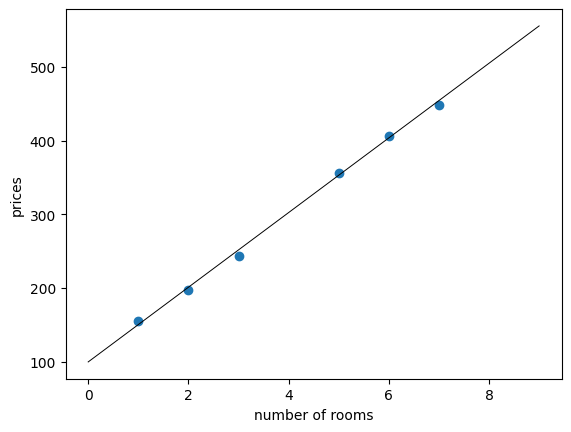

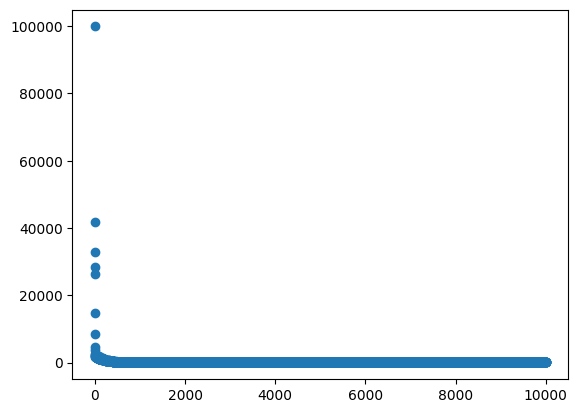

(np.float64(50.65781332767556), np.float64(99.79504258184782))

In [77]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [78]:
from sklearn.linear_model import SGDRegressor
## TODO ##
# Use sklearn to implement linear regression (SGDRegressor) that fit our data (features, labels)
# set tol = None
# Tune max_iter
model =SGDRegressor(tol=None,max_iter=1000)
model.fit(features.reshape(-1,1),labels)

SGDRegressor(tol=None)

In [79]:
## TODO ##
# print the coefficients and bias of this model
print(model.coef_)
print(model.intercept_)

[52.688]
[87.771]


In [80]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms
test=np.array([4]).reshape(-1,1)
model.predict(test)

array([298.524])

### Normal Equation



In [81]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features
    X = features.reshape(-1,1)
    ones = np.ones(len(X)).reshape(-1,1)
    x = np.concatenate((ones,X),axis=1)
    W = np.linalg.inv(x.T@x)@x.T@labels
    return W

W = Normal_Equation(features,labels)
print(W)

[99.595 50.393]


### Real Example (Predict fuel efficiency)

In [82]:
# Use seaborn for pairplot.
!pip install -q seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [84]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [85]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Clean data

In [86]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [87]:
dataset = dataset.dropna()

In [88]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [89]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [90]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [91]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [92]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


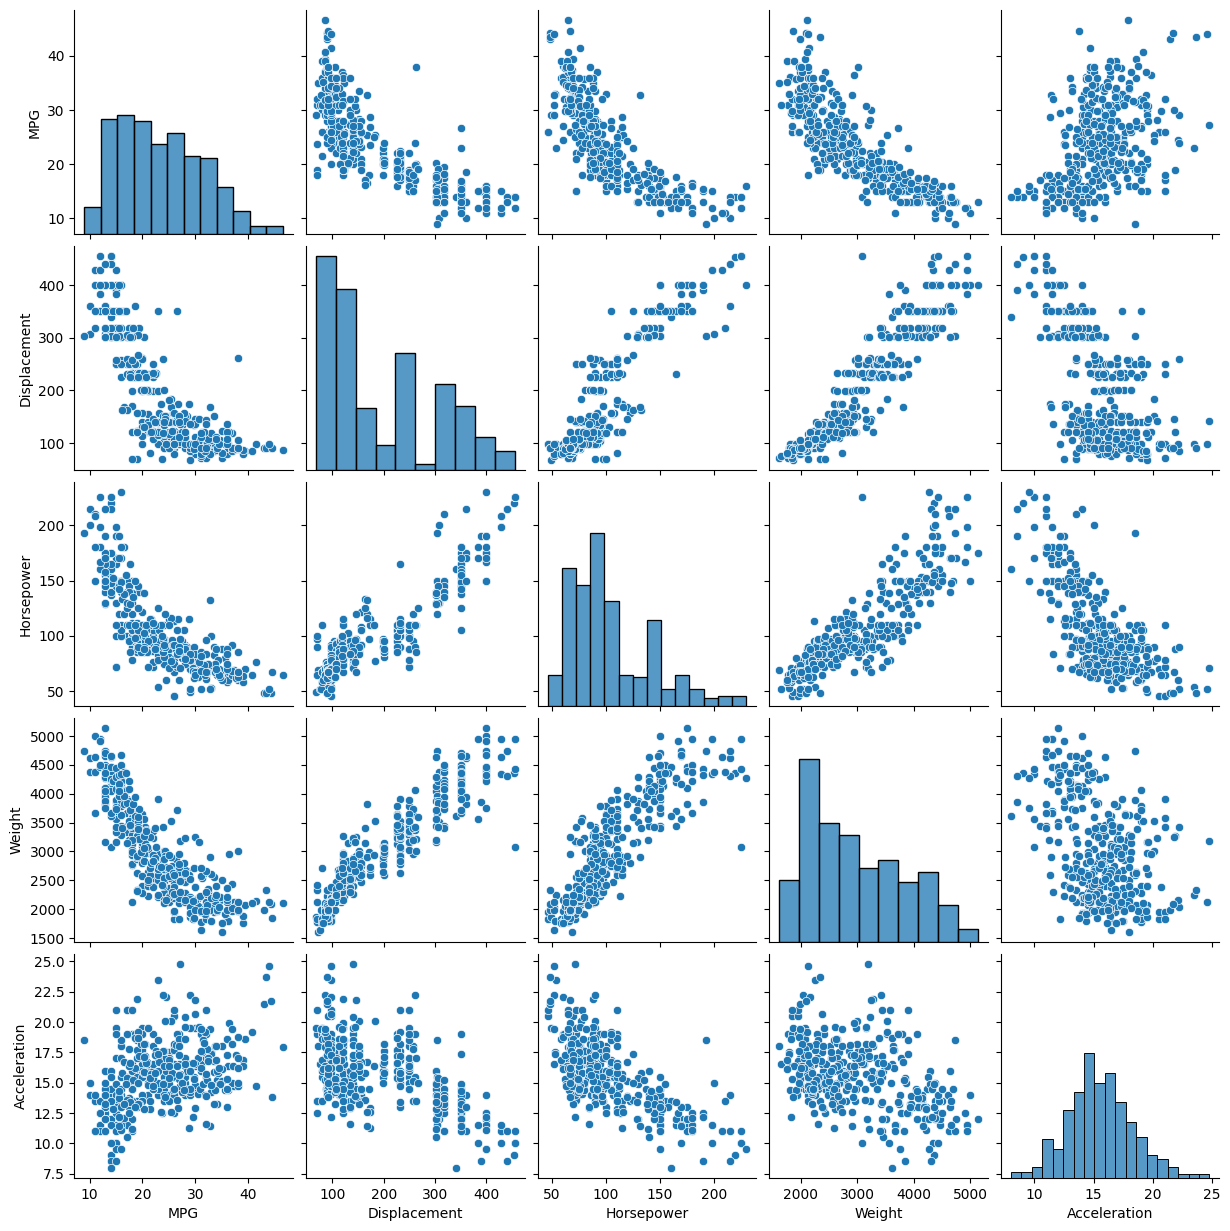

In [93]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [94]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [150]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error 

# use single-variable input to fit linear regression model
# set tol = None and learning_rate="constant"
# Tune eta0 and max_iter
# print the score and the mse error
model = SGDRegressor(tol=None,eta0=0.0001,learning_rate='constant',max_iter=1000)
model.fit(datasetXsingle,datasetY)
print(model.score(datasetXsingle,datasetY))
y_pred = model.predict(datasetXsingle)
print(mean_squared_error(datasetY, y_pred))

0.5779123990902412
25.647198493824213


c:\Users\mazen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import SGDRegressor

# use multi-variable input to fit linear regression model
# set tol = None and learning_rate="constant"
# Tune eta0 and max_iter
# print the score and the mse error
model = SGDRegressor(tol=None,eta0=0.0001,learning_rate='constant',max_iter=100000)
model.fit(datasetXMulti,datasetY)
print(model.score(datasetXMulti,datasetY))
y_pred = model.predict(datasetXMulti)
print(mean_squared_error(datasetY, y_pred))

c:\Users\mazen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-5.364637873423773e+31
3.259700879405895e+33


In [157]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# use Normalized mlti-variable input to fit linear regression model
# set tol = None and learning_rate="constant"
# Tune eta0 and max_iter
# use sklearn.preprocessing.StandardScaler for normalization
# print the score and the mse error
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(datasetXMulti)

model = SGDRegressor(tol=None,eta0=0.001,learning_rate='constant',max_iter=100000)
model.fit(X_train_scaled,datasetY)
print(model.score(X_train_scaled,datasetY))
y_pred = model.predict(X_train_scaled)
print(mean_squared_error(datasetY, y_pred))

c:\Users\mazen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8237975078957165
10.706545940616778
